In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Servo Mechanism.csv")

In [4]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [6]:
df.isnull().sum()

Motor    0
Screw    0
Pgain    0
Vgain    0
Class    0
dtype: int64

In [7]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [8]:
df.shape

(167, 5)

In [9]:
df['Motor'].value_counts()

C    40
B    36
A    36
E    33
D    22
Name: Motor, dtype: int64

In [10]:
df['Screw'].value_counts()

A    42
B    35
C    31
D    30
E    29
Name: Screw, dtype: int64

In [11]:
#get encoding of categorical fearures

In [12]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [13]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [14]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,3,6,5,11
2,3,3,4,3,6
3,1,0,3,2,48
4,3,1,6,5,6


In [15]:
y=df['Class']

In [17]:
y.shape

(167,)

In [18]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [19]:
X=df.drop('Class',axis=1)

In [20]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [21]:
X.shape

(167, 4)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=53)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(X_test)

In [29]:
y_pred

array([30.11225988, 34.65798954, 34.7280341 ,  5.17748247,  8.89591838,
       11.43273836, 19.88271372, 29.67169153, 33.01960365, 36.99279813,
       17.17847713, 18.05961384, 10.41963483, 31.12536342, 24.87010752,
        9.028981  , 27.01910632,  1.38900199, 33.20431765, 33.27436221,
       20.13856807, 11.87330671, 24.94015208, 31.75064577, 25.88321105,
       22.60534349, 21.84699852, 14.71170171,  8.08482624, 28.47277821,
       11.80326215, 36.55222978, 13.83056501,  5.61805082, 33.46017201,
       24.42953917, 23.87430138, 16.79065595, 21.77695396, 31.82069033,
        5.54800626, 17.87380404, 43.24805402, 15.52169807, 29.85640553,
       30.36701844, 23.23062585, 14.27113336, 26.39382397, 20.06852351,
       33.64488601])

In [30]:
y_pred.shape

(51,)

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
mean_squared_error(y_test,y_pred)

80.2372752578475

In [33]:
mean_absolute_error(y_test,y_pred)

7.483881601271093

In [34]:
r2_score(y_test,y_pred)

0.5992080978628083

In [35]:
import matplotlib.pyplot as plt

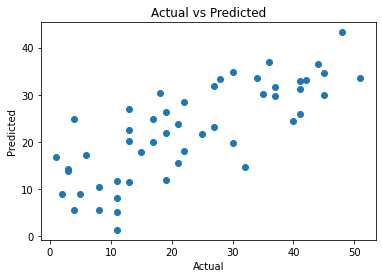

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predicted')
plt.show()

In [38]:
#get prediction

In [65]:
X_new=df.sample(1)

In [66]:
X_new

,Motor,Screw,Pgain,Vgain,Class
67,3,2,3,2,34


In [67]:
X_new=X_new.drop('Class',axis=1)

In [68]:
X_new

,Motor,Screw,Pgain,Vgain
67,3,2,3,2


In [69]:
lr.predict(X_new)

array([33.64488601])